## Коэффициент детерминации (r2_score)

Коэффициент детерминации (R-квадрат) - это метрика, которая измеряет, насколько хорошо модель соответствует данным. Он показывает, какую долю вариации целевой переменной можно объяснить с помощью предсказаний модели. Значения R-квадрата могут варьироваться от 1 до *-inf*, причем оценки 0 и ниже означают, что модель не объясняет никакой вариации, а 1 означает, что модель идеально соответствует данным.

Чем ближе значение R-квадрата к 1, тем лучше модель соответствует данным. Если значение R-квадрата близко к 0, то модель не объясняет вариацию данных и, следовательно, не может быть использована для предсказаний.

R-квадрат полезен в случаях, когда мы хотим оценить качество модели и сравнить ее с другими моделями. Он также может использоваться для определения того, какие функции или переменные наиболее важны для предсказаний.

In [40]:
import math
import numpy as np

def get_r2_score(y_true, y_pred) -> float:
    n = len(y_true)
    error_num = 0
    error_denom = 0
    y_mean = np.mean(y_true)
    for i in range(n):
        error_num += (y_true[i] - y_pred[i]) ** 2
        error_denom += (y_true[i] - y_mean) ** 2

    if error_denom == 0:
        if error_num != 0:
            return 0.0
        else:
            return 1.0
    return 1 - error_num / error_denom

### Сравним реализацию со встроенной функцией в scikit learn

In [41]:
from sklearn.metrics import r2_score

# истинные значения
y_true = [3, 0.5, 2, 7]
# предсказанные значения
y_pred = [2.5, 0.0, 2, 8]

# расчет коэффициент детерминации
error = r2_score(y_true, y_pred)
my_error = get_r2_score(y_true, y_pred)

print("Полученный коэффициент детерминации на тесте 1:", error)
print("Рассчитанный коэффициент детерминации на тесте 1:", my_error)

Полученный коэффициент детерминации на тесте 1: 0.9353099730458221
Рассчитанный коэффициент детерминации на тесте 1: 0.9353099730458221


In [42]:
from sklearn.metrics import r2_score

# истинные значения
y_true = [2, 2, 2]
# предсказанные значения
y_pred = [2, 2, 2]

# расчет коэффициент детерминации
error = r2_score(y_true, y_pred)
my_error = get_r2_score(y_true, y_pred)

print("Полученный коэффициент детерминации на тесте 2:", error)
print("Рассчитанный коэффициент детерминации на тесте 2:", my_error)

Полученный коэффициент детерминации на тесте 2: 1.0
Рассчитанный коэффициент детерминации на тесте 2: 1.0


In [43]:
from sklearn.metrics import r2_score

# истинные значения
y_true = [2, 2, 2]
# предсказанные значения
y_pred = [2, 2, 2 + 1e-8]

# расчет коэффициент детерминации
error = r2_score(y_true, y_pred)
my_error = get_r2_score(y_true, y_pred)

print("Полученный коэффициент детерминации на тесте 3:", error)
print("Рассчитанный коэффициент детерминации на тесте 3:", my_error)

Полученный коэффициент детерминации на тесте 3: 0.0
Рассчитанный коэффициент детерминации на тесте 3: 0.0


In [44]:
from sklearn.metrics import r2_score

# истинные значения
y_true = [1, 2, 3, 4, 5]
# предсказанные значения
y_pred = [3, 3, 3, 3, 3]

# расчет коэффициент детерминации
error = r2_score(y_true, y_pred)
my_error = get_r2_score(y_true, y_pred)

print("Полученный коэффициент детерминации на тесте 4:", error)
print("Рассчитанный коэффициент детерминации на тесте 4:", my_error)

Полученный коэффициент детерминации на тесте 4: 0.0
Рассчитанный коэффициент детерминации на тесте 4: 0.0


In [45]:
from sklearn.metrics import r2_score

# истинные значения
y_true = [1, 2, 3, 4, 5]
# предсказанные значения
y_pred = [2, 2, 2, 2, 4]

# расчет коэффициент детерминации
error = r2_score(y_true, y_pred)
my_error = get_r2_score(y_true, y_pred)

print("Полученный коэффициент детерминации на тесте 5:", error)
print("Рассчитанный коэффициент детерминации на тесте 5:", my_error)

Полученный коэффициент детерминации на тесте 5: 0.30000000000000004
Рассчитанный коэффициент детерминации на тесте 5: 0.30000000000000004


### Рассмотрим поведение выборки на различных константных предсказаниях и найдем оптимальный вариант подобной константы

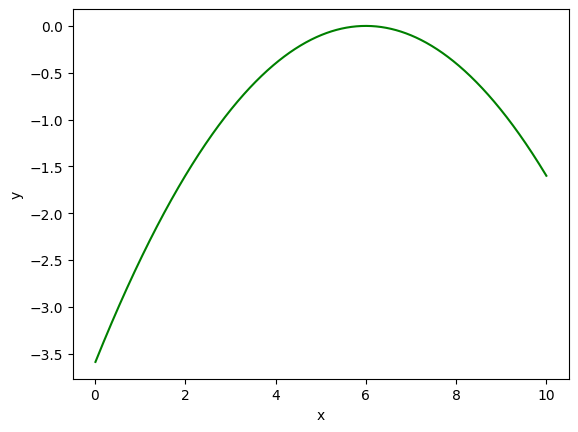

Наилучший показатель равен 0.0 и получен при значении 6.0
Оптимальная константа при этом равна 6.0


In [54]:
import matplotlib.pyplot as plt
import numpy as np

x = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11
y_true = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11
checks = [i / 100 for i in range(1, 1001)]
errors = []

for i in checks:
  y_pred = [i for j in range(len(y_true))]
  errors.append(round(r2_score(y_true, y_pred), 6))

plt.plot(checks, errors, color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f'Наилучший показатель равен {max(errors)} и получен при значении {checks[errors.index(max(errors))]}')
print(f'Оптимальная константа при этом равна {round(np.mean(y_true), 2)}')

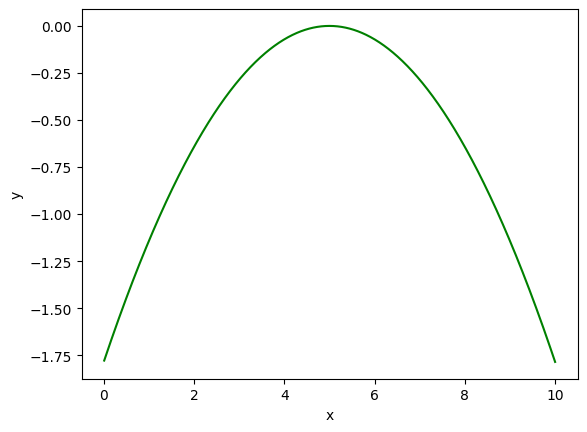

Наилучший показатель равен 0.0 и получен при значении 5.0
Оптимальная константа при этом равна 5.0


In [53]:
import matplotlib.pyplot as plt
import numpy as np

x = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
y_true = 1, 1, 1, 1, 5, 10, 10, 6, 5, 10
checks = [i / 100 for i in range(1, 1001)]
errors = []

for i in checks:
  y_pred = [i for j in range(len(y_true))]
  errors.append(round(r2_score(y_true, y_pred), 6))

plt.plot(checks, errors, color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f'Наилучший показатель равен {max(errors)} и получен при значении {checks[errors.index(max(errors))]}')
print(f'Оптимальная константа при этом равна {round(np.mean(y_true), 2)}')

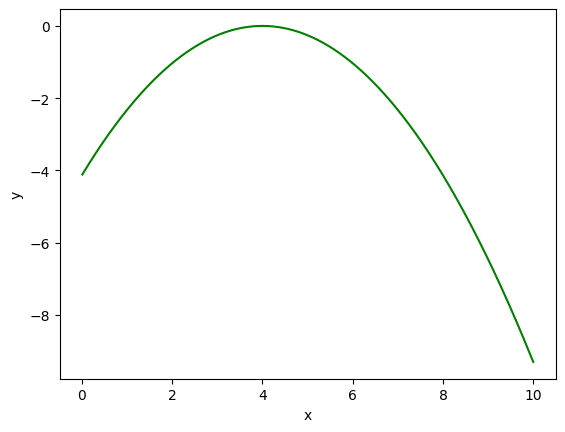

Наилучший показатель равен 0.0 и получен при значении 4.0
Оптимальная константа при этом равна 4.0


In [52]:
import matplotlib.pyplot as plt
import numpy as np

x = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
y_true = 7.3, 4.6, 2.1, 5.3, 6.2, 1.3, 5.4, 3.2, 1.4, 3.2
checks = [i / 100 for i in range(1, 1001)]
errors = []

for i in checks:
  y_pred = [i for j in range(len(y_true))]
  errors.append(round(r2_score(y_true, y_pred), 6))

plt.plot(checks, errors, color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f'Наилучший показатель равен {max(errors)} и получен при значении {checks[errors.index(max(errors))]}')
print(f'Оптимальная константа при этом равна {round(np.mean(y_true), 2)}')

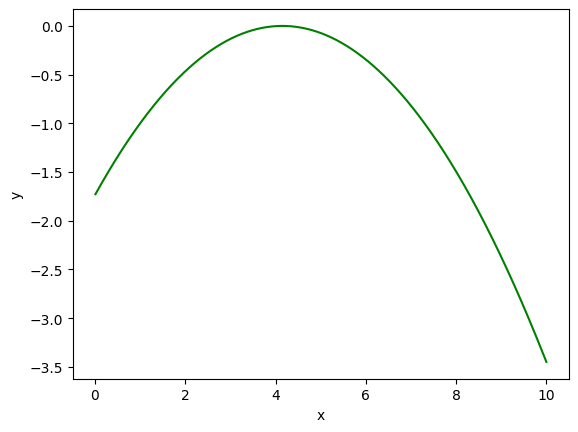

Наилучший показатель равен 0.0 и получен при значении 4.15
Оптимальная константа при этом равна 4.15


In [51]:
import matplotlib.pyplot as plt
import numpy as np

x = 1
y_true = [7.3, 1]
checks = [i / 100 for i in range(1, 1001)]
errors = []

for i in checks:
  y_pred = [i for j in range(len(y_true))]
  errors.append(round(r2_score(y_true, y_pred), 6))

plt.plot(checks, errors, color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f'Наилучший показатель равен {max(errors)} и получен при значении {checks[errors.index(max(errors))]}')
print(f'Оптимальная константа при этом равна {round(np.mean(y_true), 2)}')

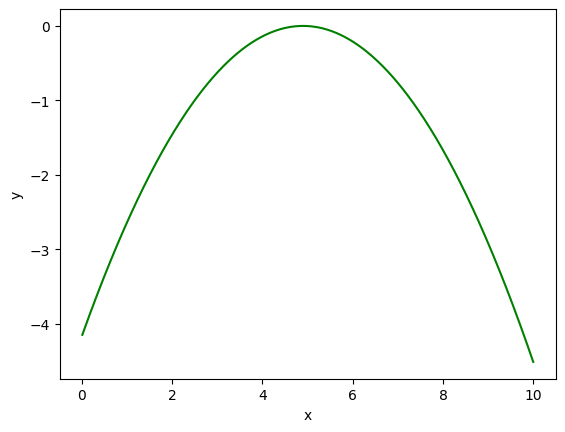

Наилучший показатель равен 0.0 и получен при значении 4.9
Оптимальная константа при этом равна 4.9


In [50]:
import matplotlib.pyplot as plt
import numpy as np

x = 1
y_true = [7.3, 2.5]
checks = [i / 100 for i in range(1, 1001)]
errors = []

for i in checks:
  y_pred = [i for j in range(len(y_true))]
  errors.append(round(r2_score(y_true, y_pred), 6))

plt.plot(checks, errors, color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f'Наилучший показатель равен {max(errors)} и получен при значении {checks[errors.index(max(errors))]}')
print(f'Оптимальная константа при этом равна {round(np.mean(y_true), 2)}')